# 多项式拟合
本文件用于实现多项式拟合相关内容

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### 采样
对 $y = sin(2\pi x)$ 进行采样，获取数据集

In [22]:
def generate_dataset(n_batches, n_samples):
    """
    对 y = sin(2πx) 采样 n_batches 个数据集，每个数据集 n_samples 个样本
    :param n_batches: 批次数（生成多少组数据）
    :param n_samples: 每批次样本数量
    :return: list[(X, y)], 其中 X, y 均为 np.ndarray，形状为 (n_samples,)
    """
    datasets = []
    for _ in range(n_batches):
        # 从区间 [0,10] 均匀采样
        X = np.random.rand(n_samples)
        # 计算对应的 y 值
        y = np.sin(2 * np.pi * X)
        datasets.append((X, y))
    return datasets
    

In [14]:
data = generate_dataset(3, 5)
for i, (X, y) in enumerate(data):
    print(f"Batch {i+1}:")
    print("X =", np.round(X, 3))
    print("y =", np.round(y, 3))

Batch 1:
X = [9.993 3.59  8.806 8.664 8.012]
y = [-0.046 -0.537 -0.939 -0.857  0.075]
Batch 2:
X = [3.109 4.318 6.346 9.348 0.393]
y = [0.631 0.911 0.823 0.815 0.622]
Batch 3:
X = [1.046 0.691 0.803 7.383 4.381]
y = [ 0.286 -0.932 -0.946  0.671  0.678]


### 多项式基函数

In [9]:
def basic_function(X, p):
    """
    根据输入的样本 X 返回对应的基函数变量矩阵
    :param X: np.ndarray, shape = (n_samples,)
        输入自变量样本向量
    :param p: int
        最高多项式维度
    :return: np.ndarray, shape = (n_samples, p + 1)
        每一行对应一个基函数 [1, x, x^2, ..., x^p]
    """
    X = np.asarray(X)
    return np.vstack([X ** i for i in range(p + 1)]).T

In [10]:
X = np.array([0.2, 0.5, 0.8])
phi = basic_function(X, 3)
print(phi)

[[1.    0.2   0.04  0.008]
 [1.    0.5   0.25  0.125]
 [1.    0.8   0.64  0.512]]


### 参数初始化

In [11]:
def init_weight(p):
    """
    参数初始化
    :param p: 多项式函数最大维度
    :return: 
    """
    w = np.random.randn(p + 1, 1)
    return w

In [12]:
p = 3
w = init_weight(p)
print(w)

[[ 2.3506366 ]
 [-0.24057769]
 [ 0.22842255]
 [-0.45759803]]


### 损失函数（L2正则化）

In [18]:
def MSE(X, y, w, lambd):
    """
    计算带L2正则项的均方误差损失
    :param X: np.ndarray, shape (n_samples, p + 1)
    :param y: np.ndarray, shape (n_samples,)
    :param w: np.ndarray, shape (p + 1, 1)
    :param lambd: float, 正则化参数
    :return: float, 损失值
    """
    y = y.reshape(-1, 1)
    n = X.shape[0]
    residual = X @ w - y
    loss_val = (residual.T @ residual) / n + lambd * (w.T @ w)
    return float(loss_val)

### 计算梯度

In [17]:
def grad(X, y, w, lambd):
    """
    计算损失函数对 w 的梯度
    :param X: np.ndarray, shape (n_samples, p + 1)
    :param y: np.ndarray, shape (n_samples,)
    :param w: np.ndarray, shape (p + 1, 1)
    :param lambd: lambd: float, 正则化参数
    :return:  np.ndarray, shape (p + 1, 1) 导数值
    """
    y = y.reshape(-1, 1)
    n = X.shape[0]
    grad_val = (X.T @ (X @ w - y)) / n + lambd * w
    return grad_val

### 训练流程

In [19]:
def fit(dataset, p, epoches, lambd, learning_rate):
    """
    对数据集进行多项式回归拟合（批量梯度下降）
    :param dataset: list[(X, y)]，每个元素是一批样本
    :param p: int, 多项式阶数
    :param epoches: int, 训练轮次
    :param lambd: float, 正则化参数
    :param learning_rate: float, 学习率
    :return: (losses, w)
        losses: 每轮平均损失
        w: 最终拟合得到的参数向量
    """
    # 1️⃣ 初始化参数向量 w，形状 (p+1, 1)
    w = init_weight(p)
    losses = []

    # 2️⃣ 开始多轮训练
    for epoch in range(epoches):
        epoch_loss = 0.0

        # 遍历每个批次 (X, y)
        for X, y in dataset:
            # 生成多项式基函数矩阵 Φ
            Phi = basic_function(X, p)

            # 计算当前批次损失
            batch_loss = MSE(Phi, y, w, lambd)
            epoch_loss += batch_loss

            # 计算梯度并更新参数（梯度下降）
            g = grad(Phi, y, w, lambd)
            w -= learning_rate * g

        # 记录该 epoch 平均损失
        epoch_loss /= len(dataset)
        losses.append(epoch_loss)

        # 可选：打印训练过程
        # print(f"Epoch {epoch+1}/{epoches}, Loss = {epoch_loss:.6f}")

    return losses, w

### 拟合结果可视化

Final parameters:
 [[ 0.60268242]
 [ 1.64096944]
 [-4.96332769]
 [-1.81864808]
 [-0.91261744]
 [ 2.3015348 ]
 [ 3.32282542]]
Final loss: 0.054549531736228174


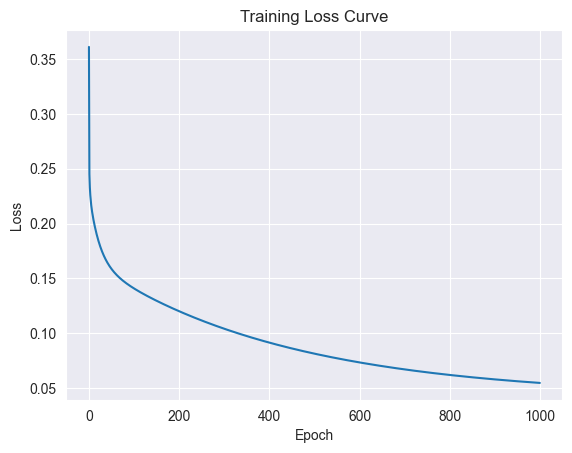

In [47]:
# 生成 10 组批次，每组 20 个样本
p = 6

dataset = generate_dataset(n_batches=10, n_samples=20)

losses, w = fit(dataset, p=p, epoches=1000, lambd=0.0001, learning_rate=0.1)

print("Final parameters:\n", w)
print("Final loss:", losses[-1])

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

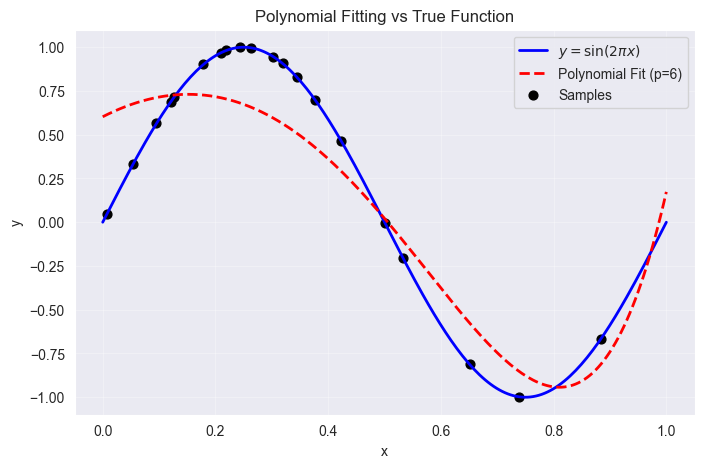

In [48]:
# ======== 绘制拟合效果 ========
# 取第一组样本
X_sample, y_sample = dataset[0]

# 构造平滑点用于绘制连续曲线
X_plot = np.linspace(0, 1, 200)
y_true = np.sin(2 * np.pi * X_plot)

# 计算拟合曲线值
Phi_plot = np.vstack([X_plot ** i for i in range(p + 1)]).T
y_pred = Phi_plot @ w

# ======== 可视化 ========
plt.figure(figsize=(8, 5))
plt.plot(X_plot, y_true, 'b-', linewidth=2, label=r'$y = \sin(2\pi x)$')   # 原函数（蓝色）
plt.plot(X_plot, y_pred, 'r--', linewidth=2, label=f'Polynomial Fit (p={p})')  # 拟合曲线（红色虚线）
plt.scatter(X_sample, y_sample, color='k', s=40, label='Samples')  # 样本点（黑色）
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Fitting vs True Function")
plt.legend()
plt.grid(alpha=0.3)
plt.show()